In [1]:
# Import TensorFlow Datasets
import tensorflow_datasets as tfds
import tensorflow as tf

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
# from tensorflow.keras.optimizers import Adam

In [3]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
# train_dataset, test_dataset = dataset['train'], dataset['test']

In [4]:
# trains_ds = tfds.load('fashion_mnist', split=[f'train[:{k}%]+train[{k+10}%:]' for k in range(0, 100, 10)], as_supervised=True)
# vals_ds = tfds.load('fashion_mnist', split=[f'train[{k}%:{k+10}%]' for k in range(0, 100, 10)], as_supervised=True)
# tests_ds = tfds.load('fashion_mnist', split='test', as_supervised=True)

In [5]:
train_dataset = dataset["train"].take(50000)
test_dataset = dataset["test"]
val_dataset = dataset["train"].skip(50000)

In [6]:
len(val_dataset)

10000

In [7]:
type(train_dataset)

tensorflow.python.data.ops.dataset_ops.TakeDataset

In [8]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

train_dataset =  train_dataset.map(normalize)
val_dataset =  val_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

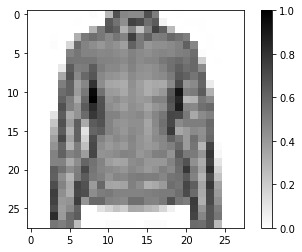

In [9]:
for image, label in test_dataset.take(1):
    break
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

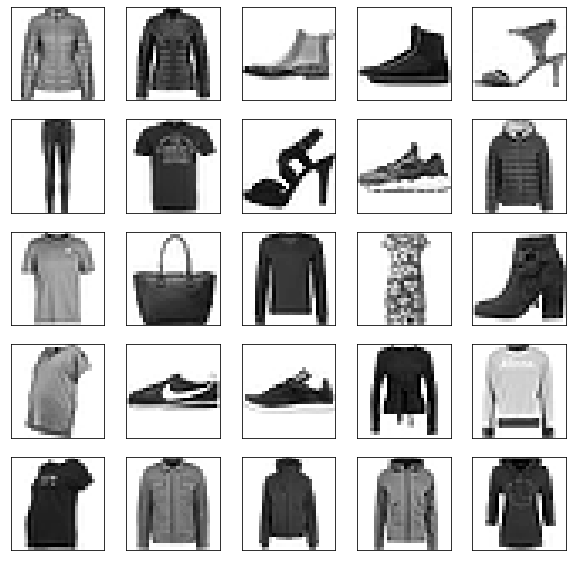

In [10]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    i += 1
plt.show()

In [11]:
labels = []
for _, label in test_dataset.take(len(test_dataset)):
    labels.append(label)

In [12]:
# images = []
# for image, _ in test_dataset.take(len(test_dataset)):
#     images.append(image)

In [13]:
labels[0].numpy()

4

In [14]:
metadata.splits['train'].num_examples

60000

In [15]:
metadata.splits['test'].num_examples

10000

In [16]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(len(train_dataset)).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)
val_dataset = val_dataset.cache().batch(BATCH_SIZE)

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0

In [17]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',
                         patience = 20,
                         verbose = 1,
                         factor = 0.75,
                         min_lr = 1e-3)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=50)

In [18]:
# type(train_dataset)

In [19]:
# train_size = int(0.7 * DATASET_SIZE)
# val_size = int(0.15 * DATASET_SIZE)
# test_size = int(0.15 * DATASET_SIZE)
# full_dataset = tf.data.TFRecordDataset(FLAGS.input_file)
# full_dataset = full_dataset.shuffle()
# train_dataset = full_dataset.take(train_size)
# test_dataset = full_dataset.skip(train_size)
# val_dataset = test_dataset.skip(test_size)
# test_dataset = test_dataset.take(test_size)

In [20]:
hist = model.fit(train_dataset, validation_data=val_dataset, epochs=100, steps_per_epoch=math.ceil(metadata.splits['train'].num_examples/BATCH_SIZE), callbacks=[lrd, mcp, es])

Epoch 1/100
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5610 - accuracy: 0.7987 - val_loss: 0.3973 - val_accuracy: 0.8516
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4351 - accuracy: 0.8454 - val_loss: 0.3888 - val_accuracy: 0.8590
Epoch 3/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3974 - accuracy: 0.8588 - val_loss: 0.3782 - val_accuracy: 0.8629
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3802 - accuracy: 0.8651 - val_loss: 0.3573 - val_accuracy: 0.8668
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3673 - accuracy: 0.8669 - val_loss: 0.3622 - val_accuracy: 0.8711
Epoch 6/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3646 - accuracy: 0.8704 - val_loss: 0.3390 - val_accuracy: 0.8786
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3504 - accuracy: 0.8745 - val_loss: 0.3402 - val_ac

In [19]:
# test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(metadata.splits['test'].num_examples/BATCH_SIZE))
# print('Accuracy on test dataset:', test_accuracy)

In [17]:
from tensorflow.keras.models import load_model

In [18]:
model = load_model('model.h5')

In [19]:
est_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(metadata.splits['test'].num_examples/BATCH_SIZE))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.5397 - accuracy: 0.8844
Accuracy on test dataset: 0.8844000101089478


In [20]:
# tf.math.confusion_matrix(labels, predictions, num_classes=None, weights=None, dtype=tf.dtypes.int32,name=None)

In [21]:
preds = model.predict(test_dataset)

In [22]:
preds[0:2]

array([[-15.910368 , -21.23434  ,  -7.238416 , -14.221786 ,  -2.5927007,
        -41.67316  ,  -6.2401266, -33.262676 , -14.604245 , -33.397556 ],
       [-15.581557 , -21.450283 ,  -7.069279 , -13.041036 ,  -2.1401067,
        -43.458576 ,  -5.2953424, -34.86306  , -14.646717 , -35.264206 ]],
      dtype=float32)

In [23]:
len(np.argmax(preds[:], axis=1))

10000

In [24]:
tf.math.confusion_matrix(labels, np.argmax(preds[:], axis=1), num_classes=10, weights=None, dtype=tf.dtypes.int32,name=None)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[863,   1,  14,  26,   5,   2,  84,   0,   5,   0],
       [  2, 966,   1,  27,   1,   0,   2,   0,   1,   0],
       [ 17,   0, 805,  15, 115,   0,  46,   0,   2,   0],
       [ 29,   5,   7, 895,  41,   0,  19,   0,   4,   0],
       [  1,   0,  74,  31, 857,   0,  34,   0,   3,   0],
       [  0,   0,   0,   1,   0, 966,   0,  24,   1,   8],
       [157,   0,  89,  34,  89,   0, 623,   0,   8,   0],
       [  0,   0,   0,   0,   0,  12,   0, 979,   0,   9],
       [  2,   0,   7,   5,   5,   1,   9,   7, 964,   0],
       [  2,   0,   0,   0,   0,   5,   1,  66,   0, 926]], dtype=int32)>

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
labels_numpy = [label.numpy() for label in labels]
labels_numpy[:10]

[4, 4, 9, 7, 5, 1, 0, 5, 7, 4]

In [27]:
confusion_matrix(labels_numpy, np.argmax(preds[:], axis=1))

array([[863,   1,  14,  26,   5,   2,  84,   0,   5,   0],
       [  2, 966,   1,  27,   1,   0,   2,   0,   1,   0],
       [ 17,   0, 805,  15, 115,   0,  46,   0,   2,   0],
       [ 29,   5,   7, 895,  41,   0,  19,   0,   4,   0],
       [  1,   0,  74,  31, 857,   0,  34,   0,   3,   0],
       [  0,   0,   0,   1,   0, 966,   0,  24,   1,   8],
       [157,   0,  89,  34,  89,   0, 623,   0,   8,   0],
       [  0,   0,   0,   0,   0,  12,   0, 979,   0,   9],
       [  2,   0,   7,   5,   5,   1,   9,   7, 964,   0],
       [  2,   0,   0,   0,   0,   5,   1,  66,   0, 926]])

In [28]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
builder = tfds.builder('fashion_mnist')

info = builder.info

classes = info.features["label"].names
print(classes)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [30]:
array = confusion_matrix(labels_numpy, np.argmax(preds[:], axis=1))
df_cm = pd.DataFrame(array, index = [i for i in classes],
                  columns = [i for i in classes])

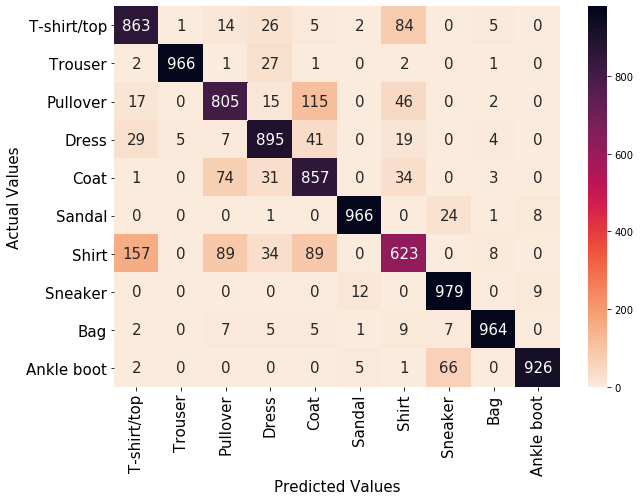

In [33]:
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap="rocket_r", annot=True, fmt="d", annot_kws={"size": 15})
plt.ylabel("Actual Values", fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Predicted Values", fontsize=15)
plt.xticks(fontsize=15);